# Shallow learning solutions of the MNIST problem

## 1. Load data

In [8]:
import numpy as np
import pandas as pd
from pathlib import Path

import argparse
args = argparse.Namespace()
args.raw_train = pd.read_csv('../data/train.csv.zip')
args.raw_test = pd.read_csv('../data/test.csv.zip')
args.predictions_folder = Path('../predictions')
args.n_splits = 5
args.n_jobs = 3
args.seed = 101

args.X = args.raw_train.iloc[:, 1:].copy()
args.y = args.raw_train['label'].copy()
args.x = args.raw_test.copy()

args.run_svm = True
args.run_random_forest = True
args.run_extra_trees = True
args.run_xgboost = True
args.run_mlp = True

args.predictions_folder.mkdir(parents=True, exist_ok=True) 

In [2]:
args.raw_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
args.raw_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
args.raw_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


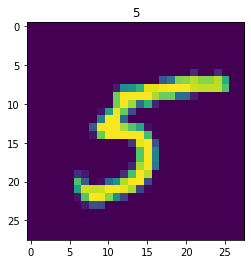

In [5]:
# Matlbab state-based style of image rendering 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

random_row = random.randrange(0, args.raw_train.shape[0], 1) 
title = args.raw_train.iloc[random_row, 0]
plt.title(title)
imgplot = plt.imshow(args.raw_train.iloc[random_row, 1:].to_numpy().reshape(28, 28))

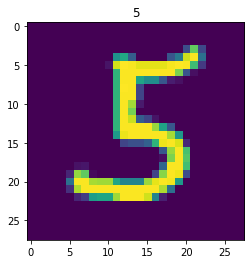

In [6]:
# OO-style image rendering
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

random_row = random.randrange(0, args.raw_train.shape[0], 1) 
title = args.raw_train.iloc[random_row, 0]
fig, ax = plt.subplots()
ax.set_title(title)
imgplot = ax.imshow(args.raw_train.iloc[random_row, 1:].to_numpy().reshape(28, 28))

## 2. Training

In [9]:
def predict(X, y, x, build_classifier, parameters, splits=args.n_splits, n_jobs=args.n_jobs):
    skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=args.seed)
    classifier = build_classifier()
    gcv = GridSearchCV(classifier, parameters, n_jobs=n_jobs, cv=skf, verbose=5)
    gcv.fit(X, y)
    print('Best params: ' + repr(gcv.best_params_))
    print('Best CV score: ' + repr(gcv.best_score_))
    print('Best std:' + repr(gcv.cv_results_['std_test_score'][gcv.best_index_]))
    classifier = gcv.best_estimator_
    predictions = classifier.predict(x)
    return gcv.best_params_, gcv.best_score_, predictions.astype(int)

In [10]:
def csv_predictions(predictions, filename):
    image_ids = np.arange(1, len(predictions) + 1)
    submission = pd.DataFrame({'ImageId': image_ids, 'Label': predictions})
    filepath = args.predictions_folder/filename
    
    submission.to_csv(filepath, index=False)
    print('Saved file: ', filepath)

### 2.1 SVM

In [9]:
%%time
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC

def svm_classifier_builder(params_dict=None):
    _params_dict = params_dict if params_dict else {}
    return SVC(**_params_dict, kernel='linear')

parameters = {'C': [0.01], 'gamma': [0.001]}

if args.run_svm:
    best_params, score, predictions = predict(args.X, args.y, args.x, svm_classifier_builder, parameters)
    csv_predictions(predictions, 'svm_predictions.csv')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed: 13.8min remaining: 20.7min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed: 32.2min finished


Best params: {'C': 0.01, 'gamma': 0.001}
Best CV score: 0.9105952380952381
Best std:0.002736542002513241
Saved file:  ../predictions/svm_predictions.csv


### 2.2 Random Forest

In [11]:
%%time
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def random_forest_classifier_builder(params_dict=None):
    _params_dict = params_dict if params_dict else {}
    return RandomForestClassifier(**_params_dict, n_jobs=args.n_jobs, oob_score=False)

parameters = {'n_estimators': [600], 'max_features': [40], 
              'min_samples_leaf': [1], 'max_depth': [30, 40]}

if args.run_random_forest:
    best_params, score, predictions = predict(args.X, args.y, args.x, random_forest_classifier_builder, parameters)
    csv_predictions(predictions, 'random_forest_predictions.csv')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:  4.7min remaining:  1.2min
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:  5.6min finished


Best params: {'max_depth': 40, 'max_features': 40, 'min_samples_leaf': 1, 'n_estimators': 600}
Best CV score: 0.9668809523809523
Best std:0.0030624638458692445
Saved file:  ../predictions/random_forest_predictions.csv
CPU times: user 3min 20s, sys: 906 ms, total: 3min 21s
Wall time: 6min 41s


### 2.3 Extra Trees

In [11]:
%%time
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

def extra_trees_classifier_builder(params_dict=None):
    _params_dict = params_dict if params_dict else {}
    return ExtraTreesClassifier(**_params_dict, n_jobs=args.n_jobs)

parameters = {'n_estimators': [750], 'max_features': [100], 
              'min_samples_leaf': [1], 'max_depth': [90, 100]}

if args.run_extra_trees:
    best_params, score, predictions = predict(args.X, args.y, args.x, extra_trees_classifier_builder, parameters)
    csv_predictions(predictions, 'extra_trees_predictions.csv')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed: 15.5min remaining:  3.9min
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed: 18.1min finished


Best params: {'max_depth': 100, 'max_features': 100, 'min_samples_leaf': 1, 'n_estimators': 750}
Best CV score: 0.9710238095238095
Best std:0.002868627710824593
Saved file:  ../predictions/extra_trees_predictions.csv


### 2.4 XgBoost

In [12]:
%%time
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier

def xgboost_classifier_builder(params_dict=None):
    _params_dict = params_dict if params_dict else {}
    return XGBClassifier(**_params_dict)

parameters = {'n_estimators': [750], 'max_depth': [75], 
              'learning_rate': [1], 'booster': ['gbtree']}

if args.run_xgboost:
    best_params, score, predictions = predict(args.X, args.y, args.x, xgboost_classifier_builder, parameters)
    csv_predictions(predictions, 'xgboost_predictions.csv')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed: 85.0min remaining: 127.5min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed: 169.9min finished


Best params: {'booster': 'gbtree', 'learning_rate': 1, 'max_depth': 75, 'n_estimators': 750}
Best CV score: 0.9643571428571429
Best std:0.0029302163402133772
Saved file:  ../predictions/xgboost_predictions.csv


### 2.5 MLP

In [13]:
%%time
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier

def mlp_classifier_builder(params_dict=None):
    _params_dict = params_dict if params_dict else {}
    return MLPClassifier(**_params_dict)

parameters = {'hidden_layer_sizes': [(1024, 64), (1024, 256)], 
              'alpha': [0.1], 'max_iter': [1000, 1200], 
              'early_stopping': [False]}

if args.run_mlp:
    best_params, score, predictions = predict(args.X, args.y, args.x, mlp_classifier_builder, parameters)
    csv_predictions(predictions, 'mlp_predictions.csv')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 70.3min
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed: 121.5min remaining:    0.0s
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed: 121.5min finished


Best params: {'alpha': 0.1, 'early_stopping': False, 'hidden_layer_sizes': (1024, 64), 'max_iter': 1000}
Best CV score: 0.9724285714285713
Best std:0.00542083826804902
Saved file:  ../predictions/mlp_predictions.csv


## 3. Model Evaluation

#### These numbers may vary from time to time 
| Model  | Test score  |
|---|---|
| SVM  | 0.91900 |
| Random Forest  | 0.96814 |
| Extra Trees  | 0.97228 |
| XgBoost  | 0.96300 |
| MLP  | 0.97542 |